# COMPETENCIA ESTADISTICA EN ANALÍCA - MAESTRIA EN CIENCIAS DE LOS DATOS Y ANALÍTICA

Liceth Cristina Mosquera Galvis Cod. 201910046228 
Juan Diego Estrada
Fecha:01-jun-2019

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn import datasets, linear_model, svm

# from scipy import interp

from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

## Logistic Regression From SCRATCH
Aplicado en la archivo ejemplo de datos de regresión categórica en la evaluación unos estudiantes

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
datos = pd.read_csv('winequality-color.csv', sep = ',')

In [27]:
datos.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
color                   6497 non-null int64
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [29]:
datos.describe()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [30]:
datos['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [31]:
df2=datos[datos.quality!=3][datos.quality!=9]
df2['quality'].value_counts()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


6    2836
5    2138
7    1079
4     216
8     193
Name: quality, dtype: int64

In [32]:
quality = pd.get_dummies(data=df2['quality'], prefix='qua')
#nuevo dataframe
df3=df2.drop(columns=['quality'])
df3=pd.concat([df2,quality],axis=1)
df3.head()


,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qua_4,qua_5,qua_6,qua_7,qua_8
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,0,0,0
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,0,0,0
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,1,0,0
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0,0


In [33]:
df2['color'].value_counts()

0    4873
1    1589
Name: color, dtype: int64

In [34]:
#verificamos si hay NAN
df2.isna().sum()

color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
X = df3.iloc[:,1:19]
scalerX = StandardScaler()
Xsc = scalerX.fit_transform(X)
y = df3['color']

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qua_4,qua_5,qua_6,qua_7,qua_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0,0


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: color, dtype: int64

<IPython.core.display.Javascript object>


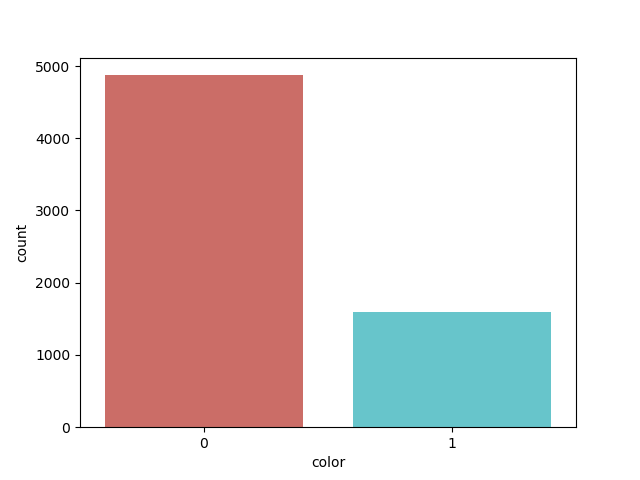

In [39]:
%matplotlib notebook
sns.countplot(x='color',data=df3,palette='hls')
plt.show()
plt.savefig('count_plot')

In [40]:
df3.groupby('color').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qua_4,qua_5,qua_6,qua_7,qua_8
color,,,,,,,,,,,,,,,,,
0,6.851149,0.277995,0.334131,6.393741,0.045756,35.236097,138.251283,0.994026,3.188147,0.489934,10.513253,5.886518,0.033450,0.298994,0.451057,0.180587,0.035912
1,8.319383,0.525576,0.271605,2.538200,0.087246,15.905601,46.603524,0.996742,3.310566,0.658704,10.425928,5.652612,0.033354,0.428571,0.401510,0.125236,0.011328


In [45]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(Xsc,y, test_size = 0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)
%time model.fit(train_X, train_y)

preds = model.predict(val_X)
# accuracy
(preds == val_y).mean()

model.intercept_, model.coef_



CPU times: user 41.8 ms, sys: 4.89 ms, total: 46.7 ms
Wall time: 45.6 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([-4.26989525]),
 array([[ 0.1292117 ,  1.2988276 , -0.34626436, -4.07436944,  0.69849888,
          1.39243407, -3.44256165,  4.47820622,  0.05933951,  0.53273826,
          1.65097847,  0.05208555, -0.44412199,  0.16713441,  0.03115485,
          0.02205457, -0.13216331]]))

# Evaluación del modelo

Exactitud

## hallar martriz de confusion

In [53]:
cm = confusion_matrix(val_y,preds)
print(cm)

[[954   1]
 [  3 335]]


## Use score method to get accuracy of model

In [57]:
score = model.score(train_X, train_y)
print(score)

0.9945830915070614


In [59]:
from sklearn.metrics import classification_report
print(classification_report(val_y,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       1.00      0.99      0.99       338

   micro avg       1.00      1.00      1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



$J(\theta)=\frac{1}/{m} (-y^T log(h)-(1-y)^T log(1-h))$

$Accuracy=\frac{(TP+TN)}/{total}=\frac{(12+34)}/{50}=0.92$

$Precision=\frac{TP}/{(TP+FP)}= 12/(12+2)=0.86$

$Recall=sensitivity=\frac{TP}/{TP+TN}=12/(12+2)=0.86$

$specifity=\frac{TN}/{(TN+FN)}=34/(36)=0.94$

$Tasa FP=FPR=\frac{FP}/{(TN+FP)}=\frac{2}/{(2+12)}=0.14$


<IPython.core.display.Javascript object>


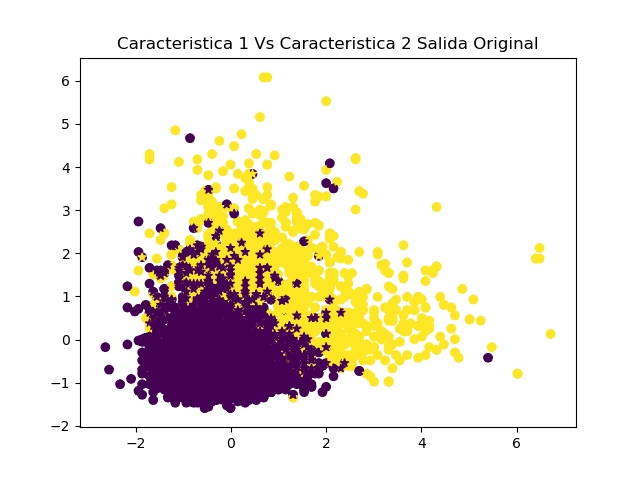

In [65]:
%matplotlib notebook
plt.title('Caracteristica 1 Vs Caracteristica 2 Salida Original')
plt.scatter(Xsc[:,0], Xsc[:,1],c = y,marker="o")
plt.scatter(Xsc[:,0], Xsc[:,1],c = preds,marker="*")
plt.show()

# Modelo hecho con la función de Logistic Regression de sklearn

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1457    7]
 [   3  472]]


Se tienen 13 predicciones correctas y 2 predicciones incorrectas

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1464
           1       0.99      0.99      0.99       475

   micro avg       0.99      0.99      0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939



<IPython.core.display.Javascript object>


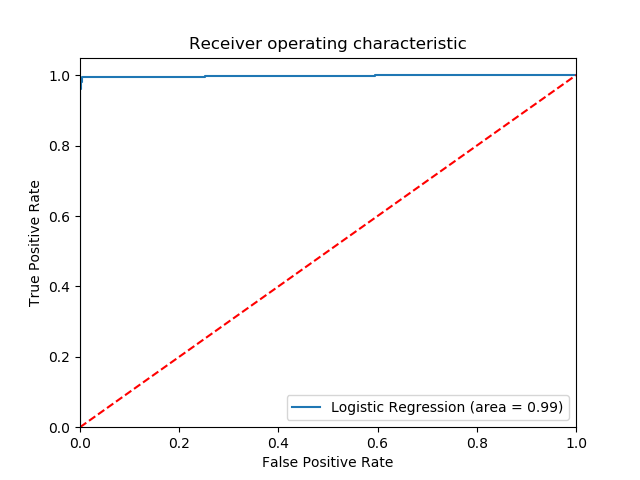

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
%time model.fit(Xsc, y)

loss: 0.6920009812985494 	
loss: 0.22285015682913836 	
loss: 0.22269154222177753 	
Wall time: 24.7 s


In [71]:
import statsmodels.api as sm
logit_model=sm.Logit(y,Xsc)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.109884
         Iterations: 35
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.803    
Dependent Variable:  color             AIC:               1450.1413
Date:                2019-08-19 19:12  BIC:               1551.7467
No. Observations:    6462              Log-Likelihood:    -710.07  
Df Model:            14                LL-Null:           -3604.4  
Df Residuals:        6447              LLR p-value:       0.0000   
Converged:           0.0000            Scale:             1.0000   
No. Iterations:      35.0000                                       
-------------------------------------------------------------------
     Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------
x1  -1.0700       0.1750  -6.1136 0.0000       -1.4130      -0.7269
x2   1.4839       0.1116  13.3014 0.0000        1.2652       1.7025
x3  -0.56

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
